# Project Overview        
<!--  -->             
* Created a machine learning model that **estimates salary of data scientist based on the features like rating,company_founded,etc.**                       
* Engineered fetures from the text of each job descrption to quantify the value companies put on pytjon,excel,tableau and msql
                               
# How will this project help?           
* This project **helps data scients/analyst to negotiate their income for an existing or a new job**               
<!--  -->           

# Resource USed            
<!--  -->            
* Packages:**Pandas,numpy,sklearn,matplotlib,seaborn**             


In [1]:
# import essential libararies
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df=pd.read_csv("C:/users/prave/datasets/csv files/glassdoor_jobs.csv")

# Exploring Dataset

In [3]:
df.shape

(956, 15)

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [6]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


**Note:** No Features has null values.but there may be the case where nan values are replaced by some other value(s) like -1,0,etc.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


**Note:** Nan values are replaced by -1 in numeric features

# Exploratory Data Analysis & Data Cleaning           
* Plotting bargraphs,countplots for numeric and categorical features respectively.             
* Removing unwanted columns           
* Handling Nan/Missing values            
* Removing unwanted alphabets/special characters from the features

In [9]:
# Removing unwanted column         
print("shape before removing: {}".format(df.shape))
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print("shape After removing: {}".format(df.shape))

shape before removing: (956, 15)
shape After removing: (956, 14)


In [10]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

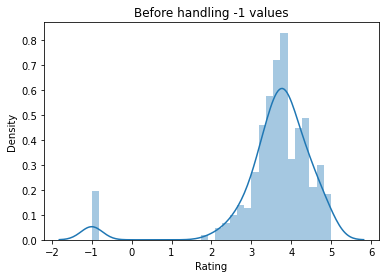

In [11]:
# visualizing rating column
sns.distplot(df['Rating'])
p=plt.title('Before handling -1 values')
plt.show()

**Note:Since the Rating feature follws the Gaussina/Normal Distribution**,we'll replace -1 values with mean of the distribution

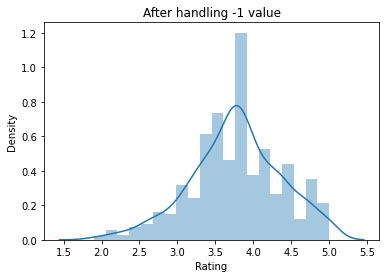

In [12]:
# Handling -1 values in Rating Column
df['Rating']=df['Rating'].apply(lambda x:np.NaN if x==-1 else x)
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

sns.distplot(df['Rating'])
plt.title("After handling -1 value")
plt.show()

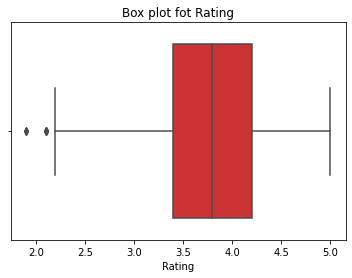

In [13]:
# Outliers in rating
sns.boxplot(df['Rating'],palette='Set1')
plt.title("Box plot fot Rating")
plt.show()

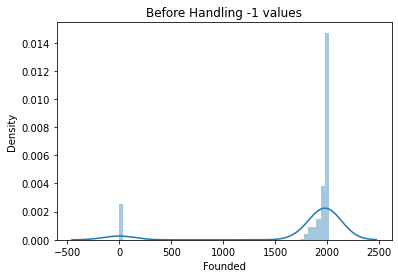

In [14]:
# Visualzing Founded column
sns.distplot(df['Founded'])
plt.title("Before Handling -1 values")
plt.show()

**Note:since Founded column does not follow Gaussian/Normal Distribution but is Right skewed graph**,we'll replace the -1 value with median of the distribution

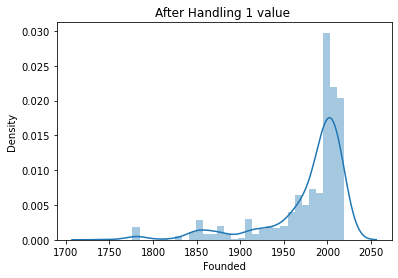

In [15]:
# Handling -1 value in Founded column
df['Founded']=df['Founded'].apply(lambda x:np.NaN if x==-1 else x)
df['Founded'].fillna(df['Founded'].median(),inplace=True)

sns.distplot(df['Founded'])
plt.title("After Handling 1 value ")
plt.show()

In [16]:
# cleaning job title
df['Job Title'].value_counts()

Data Scientist                       178
Data Engineer                         68
Senior Data Scientist                 42
Data Analyst                          18
Senior Data Engineer                  17
                                    ... 
Data Science Intern                    1
Environmental Scientist                1
Environmental Data Specialist          1
Data & Analytics Consultant (NYC)      1
Machine Learning Engineer (NLP)        1
Name: Job Title, Length: 328, dtype: int64

In [17]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'director' in title.lower():
        return 'director'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'other'
df['job_title']=df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data scientist      560
data engineer       158
data analyst        105
other                72
manager              35
director             13
machine learning     13
Name: job_title, dtype: int64

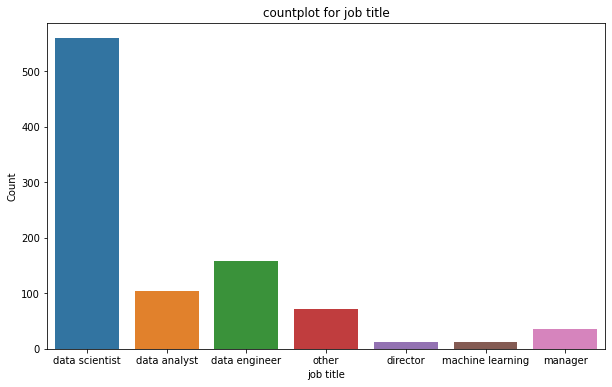

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['job_title'])
plt.title("countplot for job title")
plt.xlabel('job title')
plt.ylabel('Count')
plt.show()

In [19]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principl' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'other'
df['job_seniority']=df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

other    725
sr       228
jr         3
Name: job_seniority, dtype: int64

In [20]:
# Removing Job title column
df.drop('Job Title',axis=1,inplace=True)

In [21]:
# Cleaning salary estimate column
salary=df['Salary Estimate'].apply(lambda x:x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [22]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [23]:
salary=salary.apply(lambda x:np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [24]:
# Removing '$' and 'K' from 'salary Estimator' column
salary=salary.apply(lambda x:x if type(x)==type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [25]:
# Finding any inconsistence in the salary
print("Length of salary",len(salary.unique()))
salary.unique()[380:]

Length of salary 417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

**Note: Converting per hour salaries to per year salaries** (assuming 45 work hours per year and 52 working weeks),and removing **employed_provided_salary** from the the salary array_

In [26]:
# Removing the string employer provided salary from salary array
salary=salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace('employer provided salary:', ''))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [27]:
# Converting per hour salaryies to per year 
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[:30]

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 '],
      dtype=object)

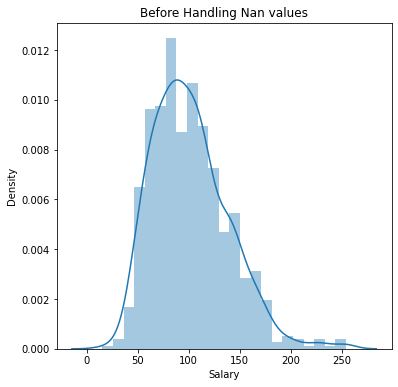

In [28]:
# Creating column for salary i.e. average og the range
df['Salary']=salary.apply(lambda x:x if type(x)==type(3.5) else (int(x.split('-')[0]) + int(x.split('-')[1].strip()))/2)
plt.figure(figsize=[6,6])
sns.distplot(df['Salary'])
plt.title('Before Handling Nan values')
plt.show()

**Note: since the Salary feature follows the Guassian/Normal Distribution**,but since there are few outlier,we'll replace -1 value with median value of the distribution

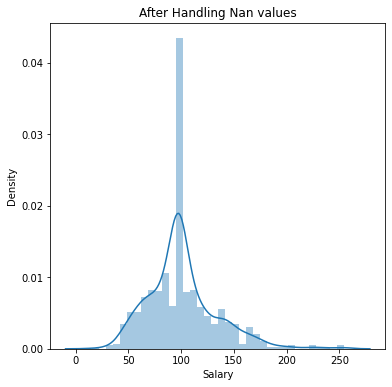

In [29]:
# Handling Nan values in salary column
df['Salary'].fillna(df['Salary'].median(),inplace=True)
plt.figure(figsize=[6,6])
sns.distplot(df['Salary'])
plt.title("After Handling Nan values")
plt.show()

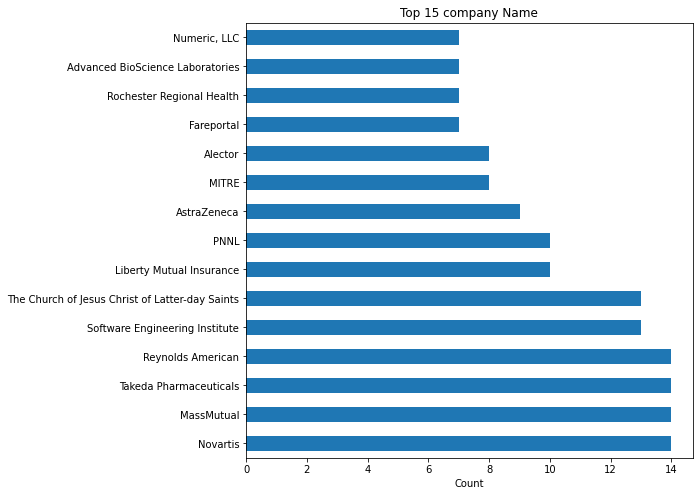

In [30]:
# Cleaning Company name column
df['Company Name']=df['Company Name'].apply(lambda x: x.split("\n")[0])

plt.figure(figsize=[8,8])
g=df['Company Name'].value_counts().nlargest(15).plot(kind='barh')
p=plt.title('Top 15 company Name')
p=plt.xlabel('Count')
plt.show()

In [31]:
# Creating a column 'Job_state'
df['job_location']=df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print("Total no.of unique Locaion: {}".format(df['job_location'].nunique()))

Total no.of unique Locaion: 46


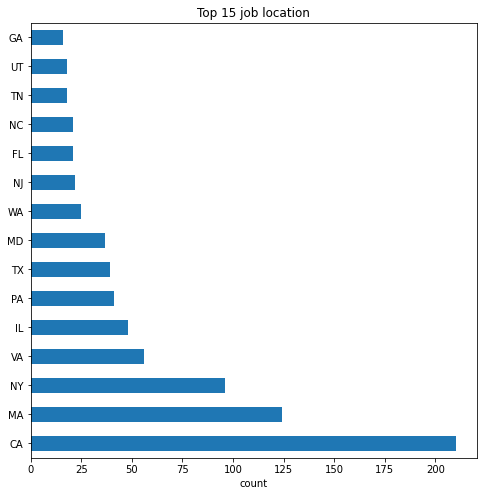

In [32]:
plt.figure(figsize=[8,8])
g=df['job_location'].value_counts().nlargest(15).plot(kind='barh')
p=plt.title("Top 15 job location")
p=plt.xlabel("count")

In [33]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [34]:
# cleaning size column
def size_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown'
    else:
        return text
df['Size']=df['Size'].apply(size_simplifier)

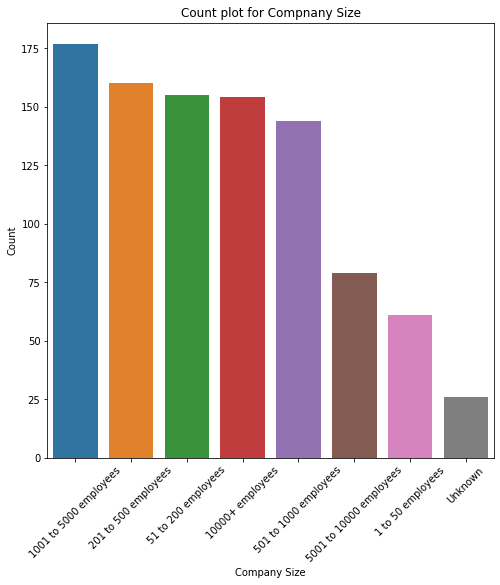

In [35]:
plt.figure(figsize=[8,8])
g=sns.countplot(x='Size',data=df,order=df['Size'].value_counts().index)
plt.title('Count plot for Compnany Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
p=g.set_xticklabels(g.get_xticklabels(),rotation=45)


In [36]:
# Cleaning 'Type of ownership' column
df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [37]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

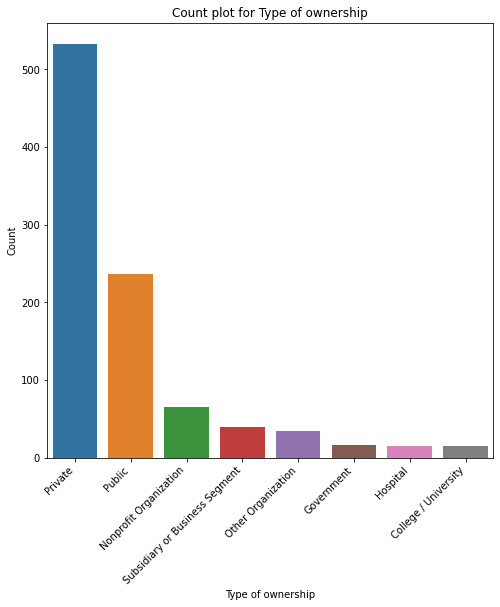

In [38]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [39]:
# Cleaning 'Industry ' column
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [40]:
df['Industry']=df['Industry'].apply(lambda x:'Others' if x=='-1' else x)

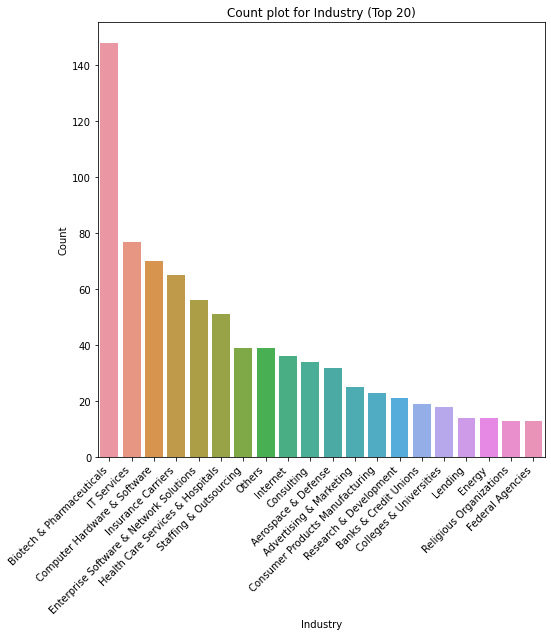

In [41]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [42]:
# cleaning 'sector' column
df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [43]:
df['Sector']=df['Sector'].apply(lambda x:'Others' if x=='-1' else x)

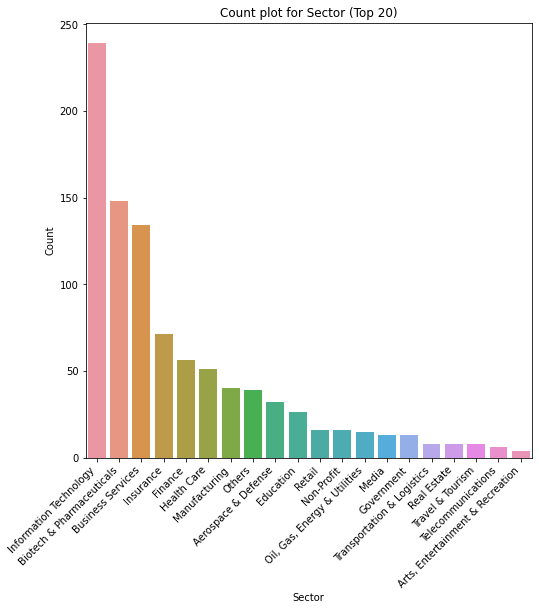

In [44]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [45]:
# cleaning'Revenue column
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [46]:
def revenue_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown / Non-Applicable'
    else:
        return text
df['Revenue']=df['Revenue'].apply(revenue_simplifier)

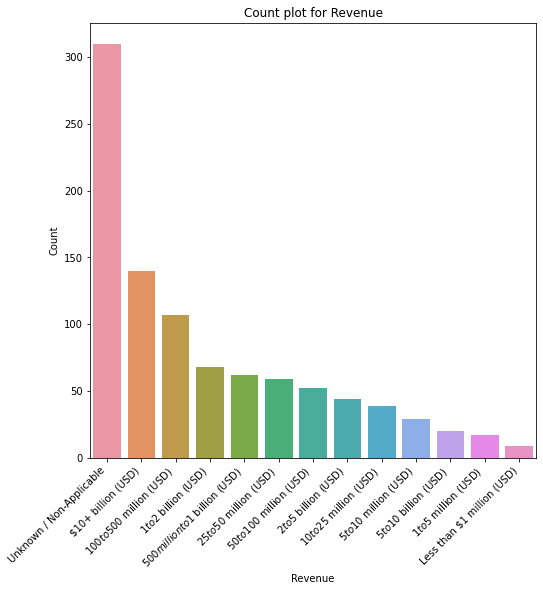

In [47]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [48]:
# cleaning 'competition' column
df['Competitors'].value_counts()

-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Slalom, Cognizant Technology Solutions, Deloitte                                                  1
Greystar, The Related Companies, Prometheus Real Estate Group                                     1
Ecolab, Eurofin Private Investment Office                                                         1
USAA, Navy Federal Credit Union, Raymond James Financial                                          1


In [49]:
df['Competitors']=df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)

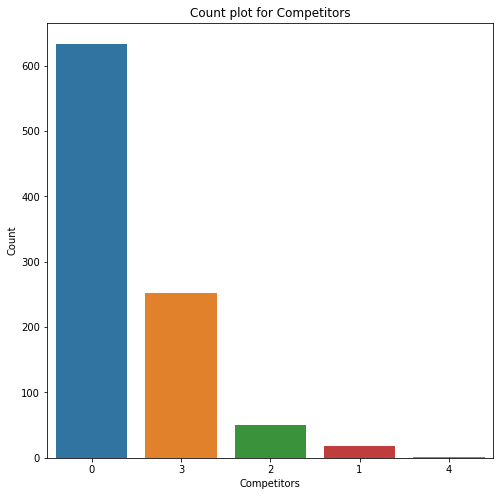

In [50]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts()[:20].index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel('Competitors')
p = plt.ylabel('Count')

In [51]:
df.tail()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
951,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006.0,Public,Internet,Information Technology,$100 to $500 million (USD),3,data engineer,sr,102.5,TN
952,$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984.0,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,data scientist,other,73.5,PA
953,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,1996.0,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,manager,other,127.5,PA
954,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,"Austin, TX","Portland, OR",201 to 500 employees,2015.0,Private,IT Services,Information Technology,$25 to $50 million (USD),1,data engineer,other,97.5,TX
955,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967.0,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),0,data scientist,other,93.5,OH


Text(0.5, 1.0, 'Correlation mtrix for Rating,Founded,Salary columns')

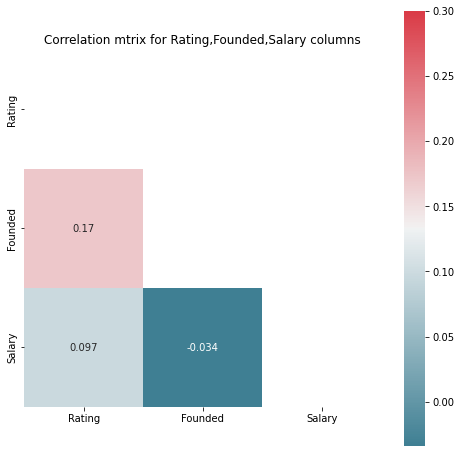

In [52]:
# Finding and plotting correlation between numerical features
cmap=sns.diverging_palette(220,10,as_cmap='Set1')
plt.figure(figsize=[8,8])
corr=df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper traingle
mask=np.triu(np.ones_like(corr,dtype=np.bool))
g=sns.heatmap(corr,mask=mask,annot=True,cmap=cmap,vmax=0.3,square=True)
plt.title('Correlation mtrix for Rating,Founded,Salary columns')

**Insight:** Rating-Founded,Rating-Salary have **positive correlation**,whereas Salary-Founded column have **negative correlation**.Also since thr correlation is not high amongst all these numerical feature,ther is **no case of multicollinearity**             
<!--  -->              
# Feature Engineering                
<!--  -->          
* Creating new feature from the existing features.         
* Trimming columns         
* Handling ordinal and nominal categorical features            
* Feature Selection            
                     
<!--  -->                 
### Creating New feature              
* Adding column of job_in-hedquaters         
* Adding column of python,excel,sql,tabelue jobs

In [53]:
# creating column of 'job_in_hedquaters'
df['Job_in_headquarters']=df.apply(lambda x:1 if x['Location'] ==x['Headquarters'] else 0,axis=1)

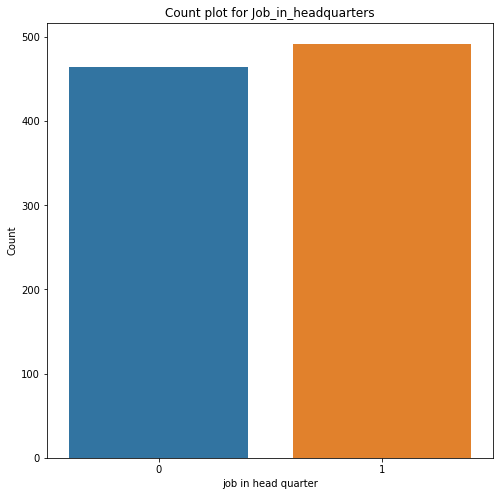

In [54]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Job_in_headquarters', data=df,)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel('job in head quarter')
p = plt.ylabel('Count')

In [55]:
df.drop(['Location',],axis=1,inplace=True)

In [56]:
# Create columns of 'python,excel,sql,tableau'  jobs
df['python_job']=df['Job Description'].apply(lambda x:1 if 'python' in x.lower() else 0)
df['excel_job']=df['Job Description'].apply(lambda x:1 if 'excel' in x.lower() else 0)
df['sql_job']=df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job']=df['Job Description'].apply(lambda x:1 if 'tableau' in x.lower() else 0)

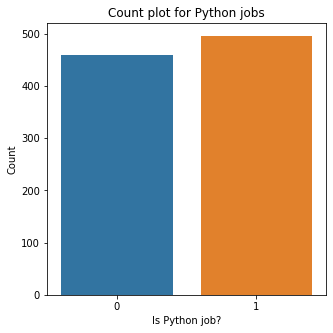

In [57]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=df)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')

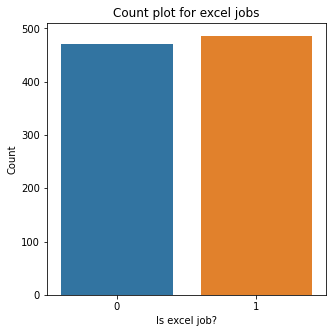

In [58]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=df)
p = plt.title('Count plot for excel jobs')
p = plt.xlabel("Is excel job?")
p = plt.ylabel('Count')

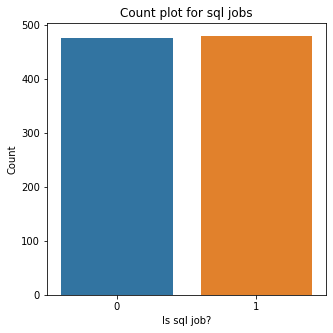

In [59]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=df)
p = plt.title('Count plot for sql jobs')
p = plt.xlabel("Is sql job?")
p = plt.ylabel('Count')

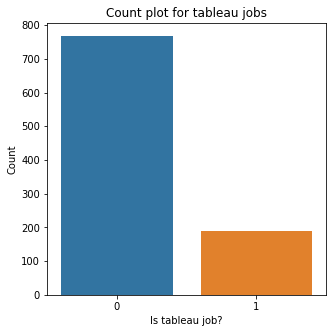

In [60]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=df)
p = plt.title('Count plot for tableau jobs')
p = plt.xlabel("Is tableau job?")
p = plt.ylabel('Count')

In [61]:
df.drop(['Job Description'],axis=1,inplace=True)

* **Trimming Column**       
Feature having more than 10 categories are trimmed so as to **reduce the dimensionality**

In [63]:
# Trimming the 'Sector' column

# Taking top 10 Sctor and replacing remaining by 'others'
sector_list=list(df['Sector'].value_counts()[:10].index)        

def sector_simplifier(text):
    if text not in sector_list:
        return 'Others'
    else:
        return text
df['Sector']=df['Sector'].apply(sector_simplifier)

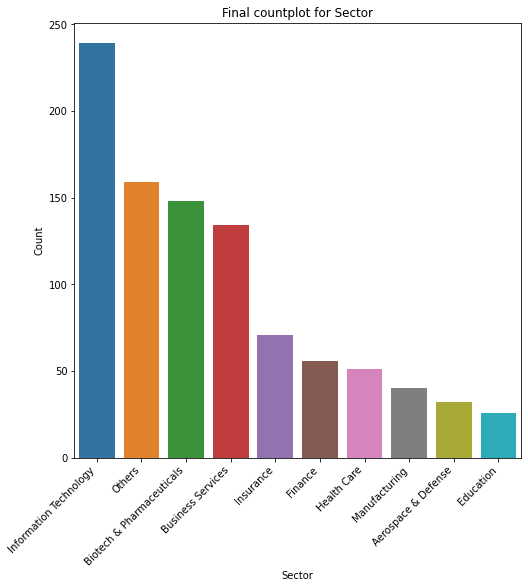

In [64]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('Final countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [66]:
# Trimming the 'Job_location' column
job_location_list=list(df['job_location'].value_counts()[:10].index)

def job_location_simplifier(text):
    if text not in job_location_list:
        return 'Others'
    else:
        return text
df['job_location']=df['job_location'].apply(job_location_simplifier)

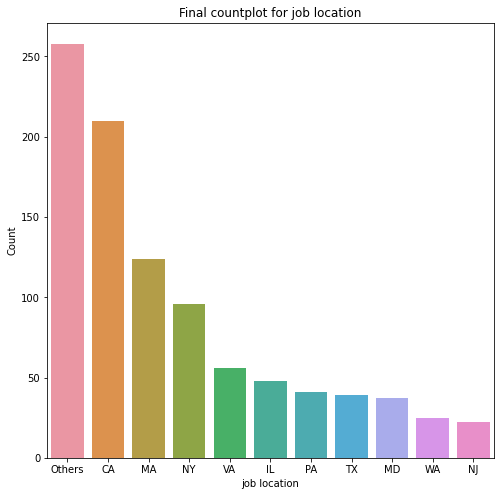

In [68]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
p = plt.title('Final countplot for job location')
p = plt.xlabel('job location')
p = plt.ylabel('Count')

In [70]:
df.drop(['Salary Estimate','Company Name','Headquarters','Industry','job_location'],axis=1,inplace=True)

In [71]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'Job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [72]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

* **Handling ordinal categorical features**           
<!--  -->      
Ordinal feature are **categorical variable that have some order associated with them**(e.g.Size,rating,remark.etc.)

In [73]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [74]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [75]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

* **Handling nominal categorical features**            
Nominal features are **categorical variable that have no numerical imortance**(e.g.occupation,name,etc.)

In [76]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (956, 15)
After: (956, 22)


In [78]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 22)
After: (956, 31)


In [79]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 31)
After: (956, 37)


In [80]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

* **Feature Seelction**              
Selecting feature based on **information gain(mutual_info_regression) and correlation_matrix**

In [82]:
X=df.drop('salary',axis=1)
y=df['salary']

In [84]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [86]:
fs=SelectKBest(score_func=mutual_info_regression,k='all')
fs.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000216D8F2E430>)

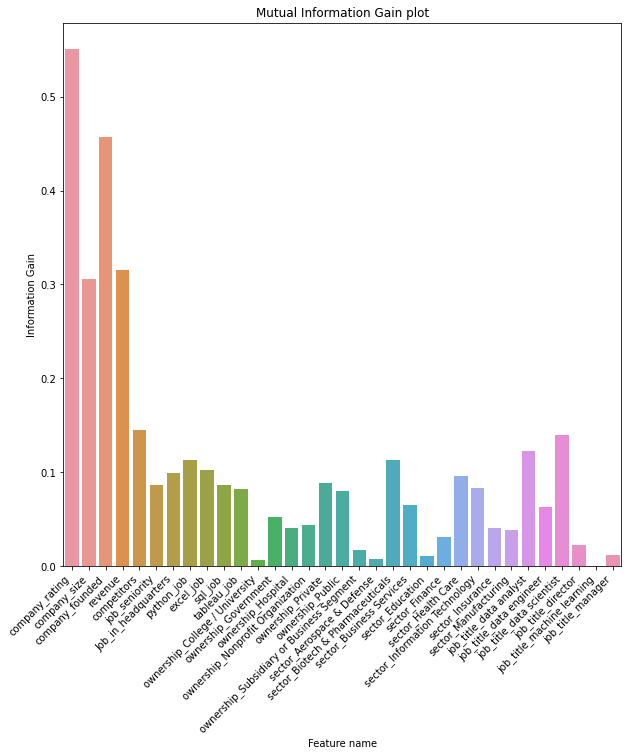

In [87]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Insight:** From feature importance chart,it is evident that there are atleast **20 features that impact the target variable**

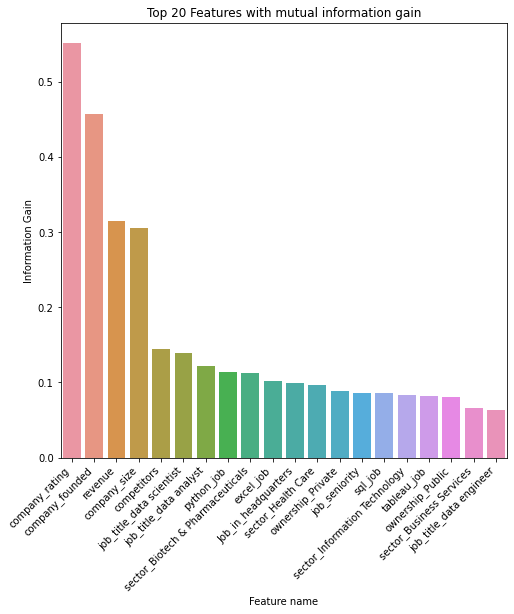

In [88]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

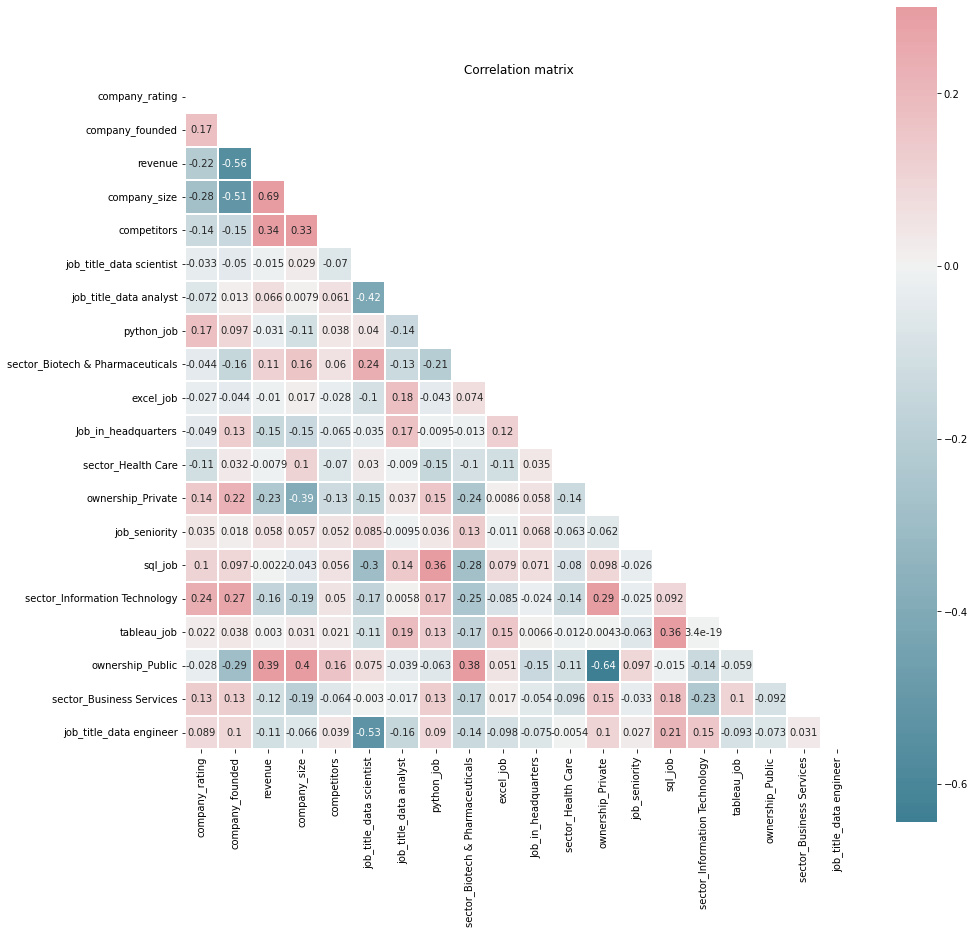

In [89]:
# Finding and plotting the correlation matrix for top20 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_feature.index].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

Range of correlation are as follows:          
* **Strong Correlation:X>0.7**           
* **Moderate correlation:0.5 < X <0.7**           
* **Weak correlation:X<0.5**             
<!--  -->               
<!--  -->      
**Insight:** From the correlation matrix,it is evident that feature(**ownership_Public,ownership_Private),(company_size,Company_founded), (job_title_data engineer,job_title_data science), and (company_revenue) are Moderately correlated**. Hence,dropping ('Revenue','Ownership_Public','Job_title_data engineer',and 'company_size') features

In [90]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)

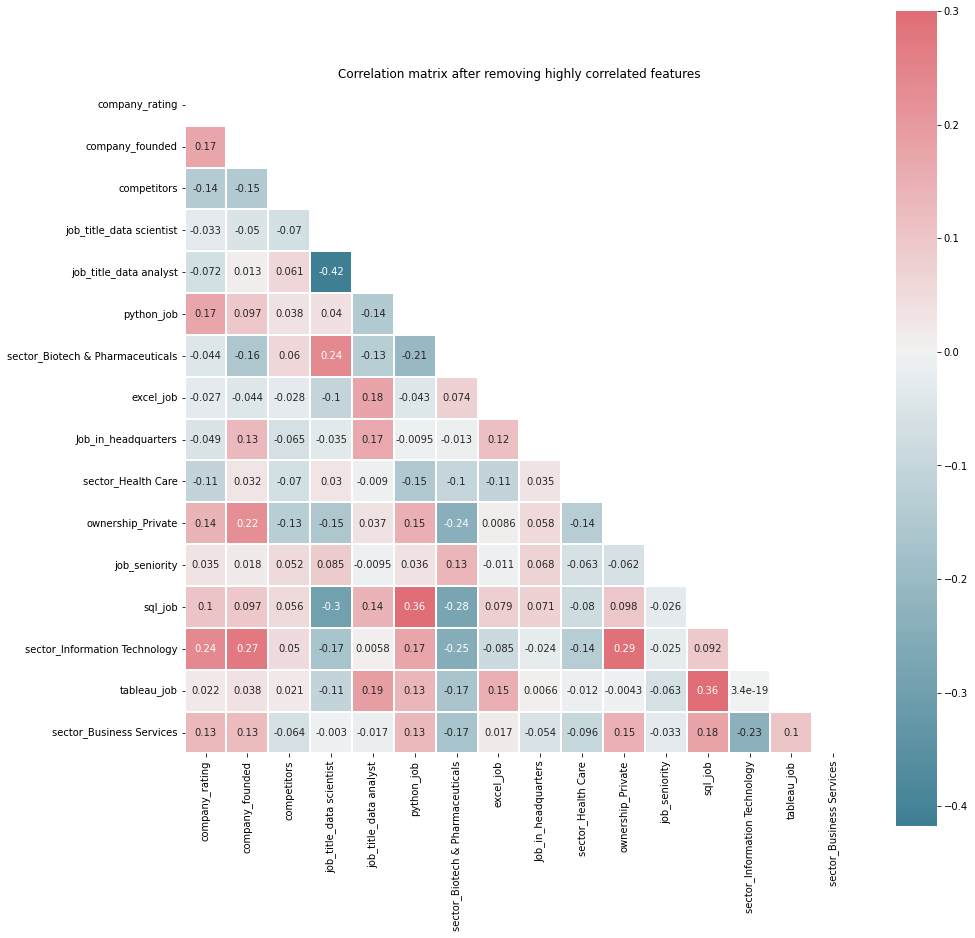

In [91]:
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [93]:
X.columns

Index(['company_rating', 'company_founded', 'competitors',
       'job_title_data scientist', 'job_title_data analyst', 'python_job',
       'sector_Biotech & Pharmaceuticals', 'excel_job', 'Job_in_headquarters',
       'sector_Health Care', 'ownership_Private', 'job_seniority', 'sql_job',
       'sector_Information Technology', 'tableau_job',
       'sector_Business Services'],
      dtype='object')

In [96]:
# Rearranging the columns

X = X[['company_rating', 'company_founded', 'competitors',
       'sector_Health Care', 'sector_Business Services', 'sector_Information Technology',
       'ownership_Private', 'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'Job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

**Feature Scaling**       
Scaling featue using **StandardScaler library**

In [97]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,Job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,3.8,1973.0,0,0,0,0,1,0,1,0,0,0,1,1,1,0
1,3.4,1984.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4.8,2010.0,0,0,1,0,1,0,1,0,0,1,1,1,0,1
3,3.8,1965.0,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2.9,1998.0,3,0,1,0,1,0,1,0,0,1,1,1,0,1


In [99]:
from sklearn.preprocessing import StandardScaler
X_prev=X.copy()
sc_rating=StandardScaler()
X['company_rating']=sc_rating.fit_transform(X[['company_rating']])

sc_founded=StandardScaler()
X['company_founded']=sc_founded.fit_transform(X[['company_founded']])

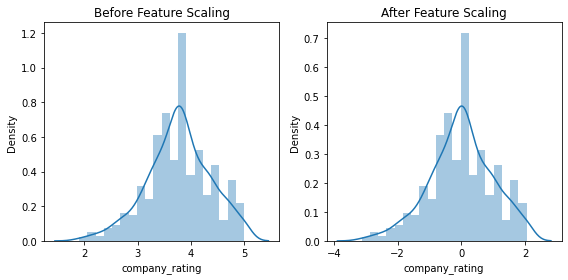

In [100]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

**Insight:Feature Scaling doesnot change distribution of the data**,it only reduces the scale of that particular feature

In [101]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,Job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,0.048588,-0.086728,0,0,0,0,1,0,1,0,0,0,1,1,1,0
1,-0.620043,0.138799,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1.720165,0.671863,0,0,1,0,1,0,1,0,0,1,1,1,0,1
3,0.048588,-0.250748,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,-1.455831,0.425833,3,0,1,0,1,0,1,0,0,1,1,1,0,1


# Model Building & Evaluation             
<!--  -->          
Metrics:Negative Root Mean Squared Error(NRMSE)        
<!--  -->             
* Multiple Linear Regression:

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cv=cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error')
print("---Average NRMSE: {}".format(round(cv.mean(),3)))
print("Standard Deviation: {}".format(round(cv.std(),3)))

---Average NRMSE: -28.12
Standard Deviation: 2.091


In [107]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso=Lasso()
cv=cross_val_score(lasso,X,y,cv=10,scoring='neg_root_mean_squared_error')
print('---Average NRMSE: {}'.format(round(cv.mean(),3)))
print("Standard Deviation: {}".format(round(cv.std(),3)))

---Average NRMSE: -28.575
Standard Deviation: 1.735


In [109]:
# Fitting Random Froest to the training set
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
cv=cross_val_score(rf,X,y,cv=10,scoring='neg_root_mean_squared_error')
print("----Average NRMSE:{}".format(round(cv.mean(),3)))
print("Standard Deviation: {}".format(cv.std(),3))

----Average NRMSE:-18.579
Standard Deviation: 5.826777704687357


In [112]:
# Fitting Gradient Boosting to the trainig set
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
cv=cross_val_score(gb,X,y,cv=10,scoring='neg_root_mean_squared_error')
print("---Average NRMSE:{}".format(cv.mean(),3))
print("Standard Deviation:{}".format(cv.std(),3))

---Average NRMSE:-24.993811923987693
Standard Deviation:2.5122930522396762


**Note:Random Forest and Gradient boosting algorithms are selected amongst all the other algorithm** because they have the highest value for Negative Root Mean Squared Error(NRMSE) i.e. lowest values for Root Mean Squared Error(RMSE) metric.And **fed to voting algorithm** to reduce the error

In [114]:
# Fitting Random forest and Gradient Boosting to voting Regressor
from sklearn.ensemble import VotingRegressor
vr=VotingRegressor([('random_forest',rf),('grdient_boosting',gb)],weights=[2,1])
cv=cross_val_score(vr,X,y,cv=10,scoring='neg_root_mean_squared_error')
print("---average NRMSE: {}".format(cv.mean(),3))
print("Standrad Deviation: {}".format(cv.std(),3))

---average NRMSE: -19.791406635743392
Standrad Deviation: 4.602801349844711


**Note:** Voting algorithm too did not perform well as compared to Random Forest algorithm hence **Random forest algorithm is selected for predicting the result of this problem statement**

# Make Predictions

In [115]:
rf=RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [118]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
  prediction_input.append(competitors)
  

  sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1]=1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [119]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 85167(USD) to 103167(USD) per annum.


In [123]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(6.5, 1969, 3, 'Information Technology', 'Private', 'data engineer', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 86315(USD) to 104315(USD) per annum.
